# Consumer Spending Project

**Geographic Insights (City-level data)**

- Regional Resilience
  - Which cities experienced the steepest spending declines during lockdown?
  - Which cities recovered the fastest?
- Category Differences Across Cities
  - Did cities with large tourist economies (e.g., Las Vegas, Orlando) see sharper drops in spend_acf (accommodation & food services) compared to industrial or government-driven cities?
- Urban vs. Smaller Cities
  - Do larger metro areas show more volatility in retail spending than smaller ones?

**State Comparisons**

- Pandemic Shock by State
    - Which states had the largest drop in total spending (spend_all) during March–April 2020?
    - Did any states rebound to baseline faster than others?
- Category Volatility Across States
    - Which states saw the sharpest declines in spend_acf (accommodation & food services) — e.g., states dependent on tourism like Nevada, Florida, Hawaii?
    - Which states showed strong growth in spend_hic (home improvement centers) or spend_gen (general merchandise)?

**National Trends**

- COVID Impact & Recovery
    - How did overall U.S. spending drop during March–April 2020, and how long did it take to recover to baseline?
    - Did durable goods rebound faster than services?
- Category Comparisons
    - Which categories (e.g., grocery, apparel, healthcare, accommodation/food) saw the biggest increases or decreases during the pandemic?
    - Did non-durable goods spending recover quicker than durable goods?
- Income Disparities
    - How did spending behavior differ between high-income ZIP codes (q4) and low-income ZIP codes (q1)?
    - Were low-income households quicker or slower to return to baseline spending?

---

## Importing Libraries & User Functions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as fm

### Functions and Other Global Varaibles

In [2]:
# Shades of gray to use for plotting
grey10 = "#1a1a1a"
grey30 = "#4d4d4d"
grey40 = "#666666"
grey50 = "#7f7f7f"
grey60 = "#999999"
grey75 = "#bfbfbf"
grey91 = "#e8e8e8"
grey98 = "#fafafa"

In [3]:
def custom_timeseries_plot(plt_style='seaborn-v0_8-whitegrid', ylabel='y-axis', nrows=1, ncols=1, fig_size=(16, 9), title='title', spine_color='#7f7f7f', xlim_left=-10, xlim_right=10, ylim_bottom=-10, ylim_top=10):
    """
    Create an empty but customized timeseries plot using Matplotlib.pyplot and returns fig, ax for plotting purposes.

    Parameters
    ----------
    plt_style : str, default 'seaborn-v0_8-whitegrid'
        The Matplotlib style desired for the plot

    fig_size : tuple of length 2, default (16,9)
        Sets the size of the figure

    nrows : int, default 1
        Sets the number of rows of subplots

    ncows : int, default 1
        Sets the number of columns of subplots
    
    title : str, default 'title'
        Sets the title of the plot
        
    ylabel : str, default 'y-axis'
        Sets y-axis label

    spine_color : str, default='#7f7f7f'
        Sets the spine and tick colors

    xlim_left : int, default -10
        Sets lower bound of x-axis

    xlim_right : int, default 10
        Sets upper bound of x-axis

    ylim_bottom : int, default -10
        Sets lower bound of y-axis

    ylim_top : int, default 10
        Sets upper bound of y-axis

    fontsize : int, default 12
        Sets fontsize for reference line labels

    Returns
    ----------
    Figure, Axes
    """
    
    # Initialize layout
    plt.style.use(plt_style)
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = fig_size)
    
    # Title Customization
    ax.set_title(title, fontsize=16, fontweight='bold', pad=15)
    
    # Spine Customization
    ax.spines[:].set_color(spine_color)
    ax.spines[:].set_linewidth(3)
    
    # Axes Customization
    ax.tick_params(direction='out', length=8, width=3, color=spine_color, labelsize=11)
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.set_xlim(left=xlim_left, right=xlim_right)
    
    ax.set_ylabel(ylabel, fontsize=14, labelpad=5)
    ax.set_ylim(bottom=ylim_bottom, top=ylim_top)

    return fig, ax

In [4]:
def insert_covid_ref_lines(ax, zero_ref_line=False, natl_emerg=False, natl_recov=False, height=0, z=0, fontsize=12):
    """
    Plots the National Emergency and Recovery Dates as vertical dotted lines. Has option to thicken the x-axis.

    Parameters
    ----------
    ax : Axes
        Required in order to specify which axes to modify

    zero_ref_line : bool, default True
        If true, plot a thick line at y=0

    natl_emerg : bool, default False
        If true, plot a vertical dotted line at natl_emerg_date

    natl_recov : bool, default False
        If true, plot a vertical dotted line at recovery_date

    height : int, default 0
        Set height of the vertical reference line labels

    z : int, defalut 0
        Set z-order of the vertical reference line labels
    """
    
    # Add Important Reference Lines and labels
    if zero_ref_line:
        ax.axhline(y=0, color=grey50, lw=3, alpha=0.5)

    if natl_emerg:
        ax.axvline(x=natl_emerg_date, color=grey50, ls='dotted', zorder=z)
        ax.text(
            x=natl_emerg_date + pd.DateOffset(days=3),
            y=height, 
            s='National Emergency Declared', 
            fontsize=fontsize, 
            fontweight='bold', 
            color=grey40,
            ha='left'
        )

    if natl_recov:
        ax.axvline(x=recovery_date, color=grey50, ls='dotted', zorder=z)
        ax.text(
            x=recovery_date - pd.DateOffset(days=3),
            y=height, 
            s='National Recovery Date',
            fontsize=fontsize, 
            fontweight='bold', 
            color=grey40,
            ha='right'
        )

## Data Loading

In [5]:
df1 = pd.read_csv('data/Affinity - National - Daily.csv')
natl_daily = df1.replace('.', np.nan)

In [6]:
df2 = pd.read_csv('data/Affinity - State - Daily.csv')
st_daily = df2.replace('.', np.nan).dropna()

In [7]:
df3 = pd.read_csv('data/Affinity - City - Daily.csv')
city_daily = df3.replace('.', np.nan).dropna()

In [8]:
cities = pd.read_csv('data/GeoIDs - City.csv')

In [9]:
states = pd.read_csv('data/GeoIDs - State.csv')

### Data Cleaning

#### Nation Level

In [10]:
natl_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Columns: 142 entries, year to provisional
dtypes: int64(4), object(138)
memory usage: 1.5+ MB


In [11]:
# Convert all columns with "spend_" from dtype object to float32
for col in [col for col in natl_daily.columns if 'spend_' in col]:
    natl_daily[col] = natl_daily[col].astype('float32')

natl_daily = natl_daily.reset_index(drop=True)

In [12]:
# Make a date column using the year, month, and day columns
date_dict = dict(year=natl_daily['year'], month=natl_daily['month'], day=natl_daily['day'])
natl_daily.insert(loc=0, column='date', value=pd.to_datetime(date_dict))

In [13]:
print(natl_daily.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Columns: 143 entries, date to provisional
dtypes: datetime64[ns](1), float32(137), int64(4), object(1)
memory usage: 791.1+ KB
None


In [14]:
print(natl_daily.isna().sum().any())

True


In [15]:
# Replace all NaNs with its column's median
for col in natl_daily.columns:
    if natl_daily[col].isna().any():
        natl_daily[col] = natl_daily[col].fillna(np.nanmedian(natl_daily[col]))

In [16]:
natl_daily.head(5)

,date,year,month,day,freq,spend_all,spend_aap,spend_acf,spend_aer,spend_apg,...,spend_s_all_q1,spend_s_all_q2,spend_s_all_q3,spend_s_all_q4,spend_s_inperson,spend_s_retail_no_grocery,spend_s_retail_w_grocery,spend_19_retail_no_grocery,spend_19_retail_w_grocery,provisional
0,2018-12-31,2018,12,31,d,0.0756,0.0822,0.00318,-0.0333,0.17,...,0.128,0.109,0.097,0.068,-0.00618,0.294,0.218,0.338,0.264,0
1,2019-01-01,2019,1,1,d,0.0756,0.0822,0.00318,-0.0333,0.17,...,0.128,0.109,0.097,0.068,-0.00618,0.294,0.218,0.338,0.264,0
2,2019-01-02,2019,1,2,d,0.0756,0.0822,0.00318,-0.0333,0.17,...,0.128,0.109,0.097,0.068,-0.00618,0.294,0.218,0.338,0.264,0
3,2019-01-03,2019,1,3,d,0.0756,0.0822,0.00318,-0.0333,0.17,...,0.128,0.109,0.097,0.068,-0.00618,0.294,0.218,0.338,0.264,0
4,2019-01-04,2019,1,4,d,0.0756,0.0822,0.00318,-0.0333,0.17,...,0.128,0.109,0.097,0.068,-0.00618,0.294,0.218,0.338,0.264,0


#### State Level

In [17]:
st_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44145 entries, 663 to 50693
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   year                     44145 non-null  int64 
 1   month                    44145 non-null  int64 
 2   day                      44145 non-null  int64 
 3   statefips                44145 non-null  int64 
 4   freq                     44145 non-null  object
 5   spend_all                44145 non-null  object
 6   spend_aap                44145 non-null  object
 7   spend_acf                44145 non-null  object
 8   spend_aer                44145 non-null  object
 9   spend_apg                44145 non-null  object
 10  spend_durables           44145 non-null  object
 11  spend_nondurables        44145 non-null  object
 12  spend_grf                44145 non-null  object
 13  spend_gen                44145 non-null  object
 14  spend_hic                44145 non-null  

In [18]:
# Convert all columns with "spend_" from dtype object to float32
for col in [col for col in st_daily.columns if 'spend_' in col]:
    st_daily[col] = st_daily[col].astype('float32')

st_daily = st_daily.reset_index(drop=True)

In [19]:
# Make a date column using the year, month, and day columns
date_dict = dict(year=st_daily['year'], month=st_daily['month'], day=st_daily['day'])
st_daily.insert(loc=0, column='date', value=pd.to_datetime(date_dict))

In [20]:
# Get stateabbrevs and names from states df with a left join
st_daily = pd.merge(st_daily, states[['statefips', 'stateabbrev', 'statename']], on='statefips', how='left')

# Move statename and abbrev next to statefips
stateabbrevs = st_daily.pop('stateabbrev')
statenames = st_daily.pop('statename')

st_daily.insert(loc=5, column='stateabbrev', value=stateabbrevs)
st_daily.insert(loc=6, column='statename', value=statenames)

In [21]:
st_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44145 entries, 0 to 44144
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     44145 non-null  datetime64[ns]
 1   year                     44145 non-null  int64         
 2   month                    44145 non-null  int64         
 3   day                      44145 non-null  int64         
 4   statefips                44145 non-null  int64         
 5   stateabbrev              44145 non-null  object        
 6   statename                44145 non-null  object        
 7   freq                     44145 non-null  object        
 8   spend_all                44145 non-null  float32       
 9   spend_aap                44145 non-null  float32       
 10  spend_acf                44145 non-null  float32       
 11  spend_aer                44145 non-null  float32       
 12  spend_apg                44145 n

In [22]:
st_daily.isna().sum()

date                       0
year                       0
month                      0
day                        0
statefips                  0
stateabbrev                0
statename                  0
freq                       0
spend_all                  0
spend_aap                  0
spend_acf                  0
spend_aer                  0
spend_apg                  0
spend_durables             0
spend_nondurables          0
spend_grf                  0
spend_gen                  0
spend_hic                  0
spend_hcs                  0
spend_inperson             0
spend_inpersonmisc         0
spend_remoteservices       0
spend_sgh                  0
spend_tws                  0
spend_retail_w_grocery     0
spend_retail_no_grocery    0
spend_all_incmiddle        0
spend_all_q1               0
spend_all_q2               0
spend_all_q3               0
spend_all_q4               0
provisional                0
dtype: int64

In [23]:
st_daily.head(5)

,date,year,month,day,statefips,stateabbrev,statename,freq,spend_all,spend_aap,...,spend_sgh,spend_tws,spend_retail_w_grocery,spend_retail_no_grocery,spend_all_incmiddle,spend_all_q1,spend_all_q2,spend_all_q3,spend_all_q4,provisional
0,2020-01-13,2020,1,13,1,AL,Alabama,d,-0.0239,-0.1450,...,-0.07820,0.0587,-0.0706,-0.09260,-0.01010,-0.035100,-0.00262,-0.02140,-0.0310,0
1,2020-01-13,2020,1,13,4,AZ,Arizona,d,-0.0106,-0.0384,...,0.02370,0.0256,-0.0215,-0.01520,-0.00507,0.000544,-0.00501,-0.00516,-0.0263,0
2,2020-01-13,2020,1,13,6,CA,California,d,-0.0140,-0.0195,...,-0.01540,0.0411,-0.0145,-0.00801,-0.01050,-0.004660,-0.00962,-0.01090,-0.0168,0
3,2020-01-13,2020,1,13,8,CO,Colorado,d,-0.0135,-0.0384,...,-0.00978,0.0294,-0.0189,-0.00632,-0.01190,-0.012200,-0.00127,-0.01690,-0.0153,0
4,2020-01-13,2020,1,13,9,CT,Connecticut,d,-0.0230,-0.0969,...,-0.10300,-0.0255,-0.0357,-0.03690,-0.02320,-0.032700,-0.03840,-0.02130,-0.0233,0


#### City Level

In [24]:
city_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46107 entries, 637 to 48705
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   year                     46107 non-null  int64 
 1   month                    46107 non-null  int64 
 2   day                      46107 non-null  int64 
 3   cityid                   46107 non-null  int64 
 4   freq                     46107 non-null  object
 5   spend_all                46107 non-null  object
 6   spend_aap                46107 non-null  object
 7   spend_acf                46107 non-null  object
 8   spend_aer                46107 non-null  object
 9   spend_apg                46107 non-null  object
 10  spend_durables           46107 non-null  object
 11  spend_nondurables        46107 non-null  object
 12  spend_grf                46107 non-null  object
 13  spend_gen                46107 non-null  object
 14  spend_hic                46107 non-null  

In [25]:
# Convert all columns with "spend_" from dtype object to float32
for col in [col for col in city_daily.columns if 'spend_' in col]:
    city_daily[col] = city_daily[col].astype('float32')

city_daily = city_daily.reset_index(drop=True)

In [26]:
# Make a date column using the year, month, and day columns
date_dict = dict(year=city_daily['year'], month=city_daily['month'], day=city_daily['day'])
city_daily.insert(loc=0, column='date', value=pd.to_datetime(date_dict))

In [27]:
# Get only city names from cities df with a left join
city_daily = pd.merge(city_daily, cities[['cityid', 'cityname']], on='cityid', how='left')

# Move cityname next to cityid
col = city_daily.pop('cityname')
city_daily.insert(loc=5, column='cityname', value=col)

In [28]:
city_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46107 entries, 0 to 46106
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     46107 non-null  datetime64[ns]
 1   year                     46107 non-null  int64         
 2   month                    46107 non-null  int64         
 3   day                      46107 non-null  int64         
 4   cityid                   46107 non-null  int64         
 5   cityname                 46107 non-null  object        
 6   freq                     46107 non-null  object        
 7   spend_all                46107 non-null  float32       
 8   spend_aap                46107 non-null  float32       
 9   spend_acf                46107 non-null  float32       
 10  spend_aer                46107 non-null  float32       
 11  spend_apg                46107 non-null  float32       
 12  spend_durables           46107 n

In [29]:
city_daily.isna().sum()

date                       0
year                       0
month                      0
day                        0
cityid                     0
cityname                   0
freq                       0
spend_all                  0
spend_aap                  0
spend_acf                  0
spend_aer                  0
spend_apg                  0
spend_durables             0
spend_nondurables          0
spend_grf                  0
spend_gen                  0
spend_hic                  0
spend_hcs                  0
spend_inperson             0
spend_inpersonmisc         0
spend_remoteservices       0
spend_sgh                  0
spend_tws                  0
spend_retail_w_grocery     0
spend_retail_no_grocery    0
provisional                0
dtype: int64

In [30]:
city_daily.head(5)

,date,year,month,day,cityid,cityname,freq,spend_all,spend_aap,spend_acf,...,spend_hic,spend_hcs,spend_inperson,spend_inpersonmisc,spend_remoteservices,spend_sgh,spend_tws,spend_retail_w_grocery,spend_retail_no_grocery,provisional
0,2020-01-13,2020,1,13,1,Los Angeles,d,0.004600,0.0138,-0.0519,...,0.0603,0.0992,-0.00869,0.00508,0.0207,0.04050,0.0409,0.00760,0.01750,0
1,2020-01-13,2020,1,13,2,New York City,d,0.003210,0.0128,-0.0122,...,-0.0370,0.1710,-0.00952,-0.08650,0.0405,-0.00148,0.0169,-0.00948,-0.01320,0
2,2020-01-13,2020,1,13,3,Chicago,d,0.012500,-0.0866,-0.0943,...,0.0423,0.0543,-0.05150,-0.07910,0.0488,-0.13700,0.0205,-0.01090,-0.05070,0
3,2020-01-13,2020,1,13,4,Houston,d,-0.000733,-0.0226,-0.0580,...,0.0754,0.1030,-0.03360,-0.05110,0.0429,-0.04690,-0.0115,-0.00212,-0.00860,0
4,2020-01-13,2020,1,13,5,Phoenix,d,0.002280,-0.0150,-0.0418,...,0.0301,0.0790,-0.01140,-0.03930,0.0382,-0.01700,0.0478,-0.00860,-0.00373,0


---

## Exploratory Data Analysis

### Nation Level

We know that consumer spending dropped sharply after the national emergency for Covid-19 was declared on March 13, 2020. When did it return to pre-pandemic levels?

It is important to note that all spending variables are measured relative to the period Jan. 6 to Feb. 2, 2020, seasonally adjusted, and calculated as a per day average or 7 day moving average depending on `freq`. When a spending variable has `freq` equal to `w`, it is a 7 day average and its `date` value is 7 days from the previous record. This period from Jan. 6 to Feb. 2 will sometimes be refered to as the baseline.

In [31]:
natl_emerg_date = pd.to_datetime('2020-03-13')

In [32]:
post_emerg = natl_daily['date'] > natl_emerg_date
spending_near_zero = np.isclose(a=natl_daily['spend_all'], b=0, atol=1e-2)
spending_positive = natl_daily['spend_all'] > 0

recovery_dates = natl_daily[post_emerg & spending_near_zero & spending_positive][['date', 'spend_all']]
recovery_date = recovery_dates['date'].max()
print('National Recovery Date : ', recovery_date)

National Recovery Date :  2021-02-19 00:00:00


We see that as a nation, we first returned to pre-pandemic levels of spending around Jan. 6, 2021. Spending fluctuates and it happens again on Feb. 19, 2021. Afterwards, consumer spending continues to grow past pre-pandemic baseline levels.

Let us investigate the spending trends between high-income zipcodes and low-income zipcodes during the recovery period across all market category codes (MCCs). `Q1` is the quartile with the lowest median income zipcodes and `Q4` is the quartile with the highest median income zipcodes.

In [33]:
# Filter for a month before national emergency date until a month after recovery date and for quartile spending in all MCCs
month_offset = 1
start_date = (natl_emerg_date - pd.DateOffset(months=month_offset))
end_date = (recovery_date + pd.DateOffset(months=month_offset))
quartiles = ['spend_all_q1', 'spend_all_q2', 'spend_all_q3', 'spend_all_q4']

spending_quartiles = natl_daily[(natl_daily['date'] >= start_date) & (natl_daily['date'] <= end_date)][['date'] + quartiles]
spending_quartiles = spending_quartiles.set_index('date')

In [34]:
# Find the lowest and highest spending average across the entire recovery precovery_period to the nearest tenth
min_spending = np.round(spending_quartiles.min().min(), decimals=1)
max_spending = np.round(spending_quartiles.max().max(), decimals=1)

print(min_spending, max_spending)

-0.4 0.2


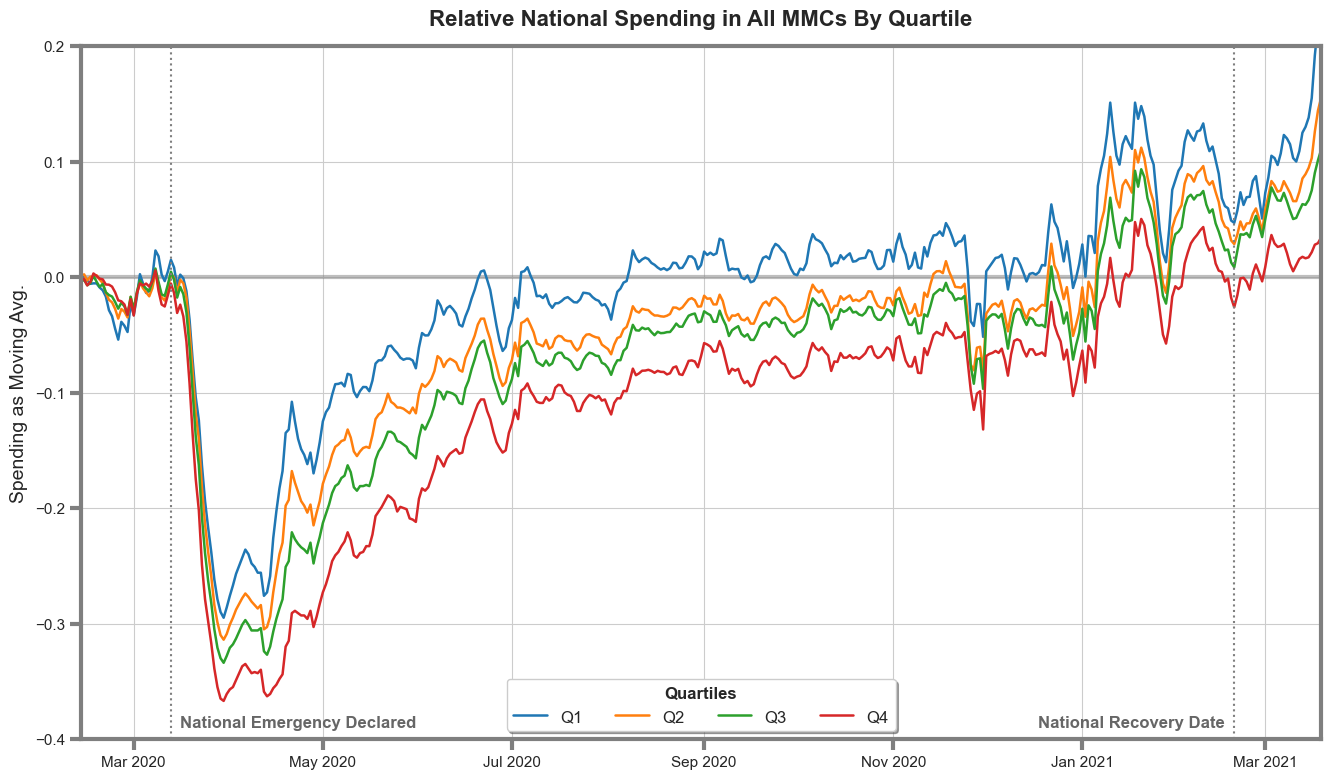

In [35]:
# Create plot
fig, ax = custom_timeseries_plot(
    title='Relative National Spending in All MMCs By Quartile',
    ylabel='Spending as Moving Avg.',
    xlim_left=start_date,
    xlim_right=end_date,
    ylim_bottom=min_spending,
    ylim_top=max_spending
)

# Include important reference lines
insert_covid_ref_lines(ax, zero_ref_line=True, natl_emerg=True, natl_recov=True, height=-0.39, z=3)

# Plot quartiles
for index, quartile in enumerate(spending_quartiles.columns):
    ax.plot(quartile, data=spending_quartiles, lw=1.8, label='Q' + str(index + 1))

# Legend Customization
ax.legend(
    loc='lower center',
    fontsize=12,
    ncols=4,
    title='Quartiles',
    title_fontproperties=fm.FontProperties(weight='bold', size=12),
    frameon=True,
    fancybox=True,
    shadow=True
)

plt.show()

Recall that `Q1` is the quartile with the lowest median income zipcodes and `Q4` is the quartile with the highest median income zipcodes.

We can see that during the start of Covid-19, the lower quartiles had a higher relative spending than the higher quartiles. This does not mean they spend more money, but rather it suggests that the lower quartiles spend a larger portion of their wealth on average. Assuming that consumers only spent money on essentials, the higher relative spending of the lower quartile suggests that they needed to spend a larger portion of their money on essentials. 

In [36]:
# Get spending in grocery and food stores (GRF) MCCs by consumers living in zipcodes with median income in the quartile #
grocery_quartile = ['spend_grf_q1', 'spend_grf_q2', 'spend_grf_q3', 'spend_grf_q4']
spend_grocery_quartiles = natl_daily[(natl_daily['date'] >= start_date) & (natl_daily['date'] <= end_date)][['date'] + grocery_quartile]
spend_grocery_quartiles = spend_grocery_quartiles.set_index('date')

In [37]:
# Find the lowest and highest grocery and food store spending average across the entire recovery precovery_period to the nearest tenth
min_grocery_spending = np.round(spend_grocery_quartiles.min().min(), decimals=1)
max_grocery_spending = np.round(spend_grocery_quartiles.max().max(), decimals=1)

print(min_grocery_spending, max_grocery_spending)

-0.1 0.8


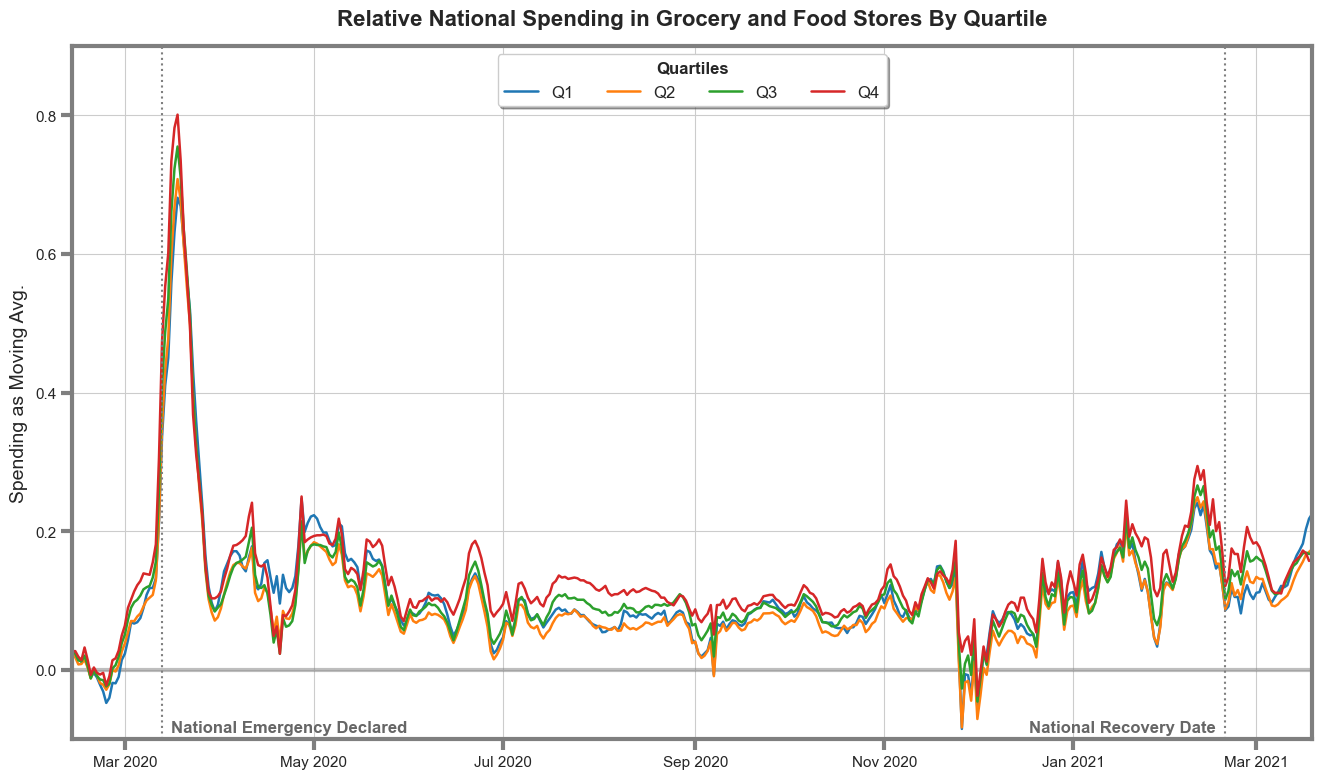

In [38]:
# Create plot
fig, ax = custom_timeseries_plot(
    title='Relative National Spending in Grocery and Food Stores By Quartile',
    ylabel='Spending as Moving Avg.',
    xlim_left=start_date,
    xlim_right=end_date,
    ylim_bottom=min_grocery_spending,
    ylim_top=max_grocery_spending + 0.1
)

# Include important reference lines
insert_covid_ref_lines(ax, zero_ref_line=True, natl_emerg=True, natl_recov=True, height=-0.09, z=3)

# Plot quartiles
for index, quartile in enumerate(spend_grocery_quartiles.columns):
    ax.plot(quartile, data=spend_grocery_quartiles, lw=1.8, label='Q' + str(index + 1))

# Legend Customization
ax.legend(
    loc='upper center',
    fontsize=12,
    ncols=4,
    title='Quartiles',
    title_fontproperties=fm.FontProperties(weight='bold', size=12),
    frameon=True,
    fancybox=True,
    shadow=True
)

plt.show()

Throughout the recovery period, we see that all four quartiles had similar relative spending trends in grocery and food stores. Despite that, it's clear that Q4 was on average spending more of their money than the other quartiles. With the preceding figure in mind, this supports that the lower quartiles had to spend more of their wealth and money on essentials during the pandemic.

### State Level


Let's continue exploring how the spending trends between quartiles. This time, we will explore the difference between the highest and lowest quartile spending per state.

In [39]:
st_min_date = st_daily['date'].min()
st_max_date = st_daily['date'].max()


quartile_by_st = st_daily[(st_daily['date'] >= st_min_date) & (st_daily['date'] <= st_max_date)][['date', 'statename'] + quartiles]
quartile_by_st['q4_q1_diff'] = quartile_by_st['spend_all_q4'] - quartile_by_st['spend_all_q1']
quartile_by_st = quartile_by_st.set_index('date')

quantile_by_state_sorted =  pd.DataFrame(quartile_by_st.groupby('statename')['q4_q1_diff'].mean().sort_values(ascending=False))
quantile_by_state_sorted

,q4_q1_diff
statename,
South Dakota,0.132148
Vermont,0.068837
Kansas,0.053177
Kentucky,0.038080
Washington,0.020653
Nebraska,0.013229
New Hampshire,0.003329
Nevada,0.000898
Arizona,-0.005689


### City Level

In [40]:
# Filter for dates slightly predating pandemic to a few months after
lockdown = city_daily.loc[(city_daily['date'] >= '2020-02-01') & (city_daily['date'] <= '2020-06-01')]

# Get the 5 cities with the lowest dips in all spending
bottom5 = lockdown.groupby('cityname')['spend_all'].agg('min').sort_values().head(5)
bottom5_citynames = list(bottom5.index)

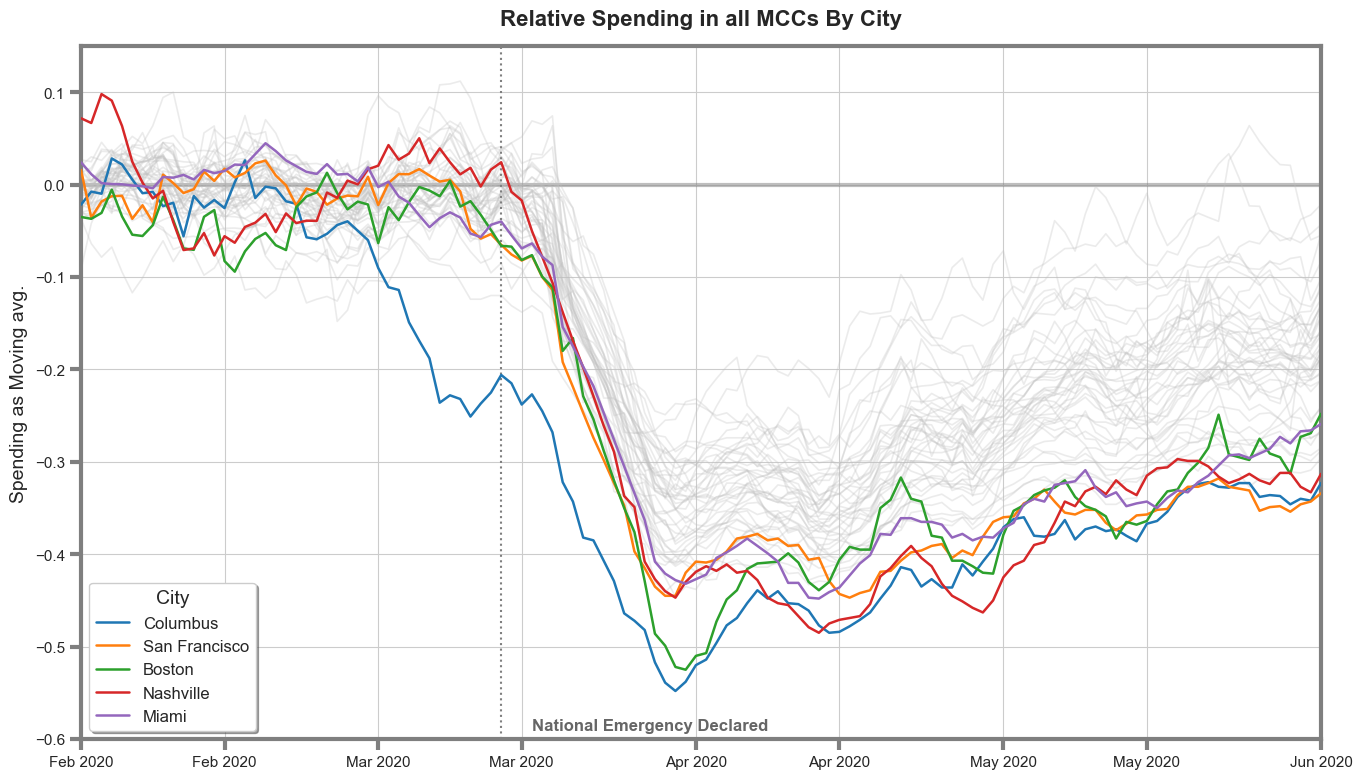

In [41]:
# Create plot
fig, ax = custom_timeseries_plot(
    title='Relative Spending in all MCCs By City',
    ylabel='Spending as Moving avg.',
    xlim_left=pd.to_datetime('2020-02-01'),
    xlim_right=pd.to_datetime('2020-06-01'),
    ylim_bottom=-0.6,
    ylim_top=0.15
)

insert_covid_ref_lines(ax, natl_emerg=True, zero_ref_line=True, height=-0.59, z=3)


# Plot spending vs date for all cities
for city in lockdown['cityname'].unique():
    data = lockdown[lockdown['cityname'] == city]
    if city in bottom5_citynames:
        # Plot and label the 5 cities with lowest dips in spending
        ax.plot('date', 'spend_all', data=data, lw=1.8, label=city, zorder=3)
    else:
        # Plot all other cities faintly and exclude them from the legend
        ax.plot('date', 'spend_all', data=data, lw=1.2, color=grey75, alpha = 0.30, label='_nolegend_')

# Legend
ax.legend(loc='lower left', fontsize=12, title_fontsize=14, title='City', frameon=True, fancybox=True, shadow=True)
plt.show()

Spending is measured relative to January 6 to February 2, 2020, seasonally adjusted, and calculated as a seven day moving average. That is, the period about four weeks before COVID disuptions began is used as the baseline for spending. The spending values are expressed relative to this baseline denoted at `y=0`.

We can see that the five cities with the steepest spending declines were Columbus, San Francisco, Boston, Nashville, and Miami. Out of the five, Columbus was first to decrease spending in all market category codes (MCC). It is not exactly obvious what these cities have in common.

However before that, let's look at the spending trends of a tourist city, such as Las Vegas, and an industrical city, like Los Angeles, across a few MCCs to see how they differ.|

In [42]:
la_vs_lv_cols = ['date', 'cityname', 'spend_grf', 'spend_sgh', 'spend_aer', 'spend_hic', 'spend_hcs', 'spend_acf']
la = lockdown.loc[city_daily['cityname'] == 'Los Angeles'][la_vs_lv_cols]
lv = lockdown.loc[city_daily['cityname'] == 'Las Vegas'][la_vs_lv_cols]

subplot_titles = [
    'Spending in Grocery and Food Store (GRF)', 
    'Spending in Sporting Goods and Hobby (SGH)',
    'Spending in Arts, Entertainment, and Recreation (AER)',
    'Spending in Home Improvement Centers (HIC)',
    'Spending in Health Care and Social Assistance (HCS)',
    'Spending in Accomodation and Food Service (ACF)'
]

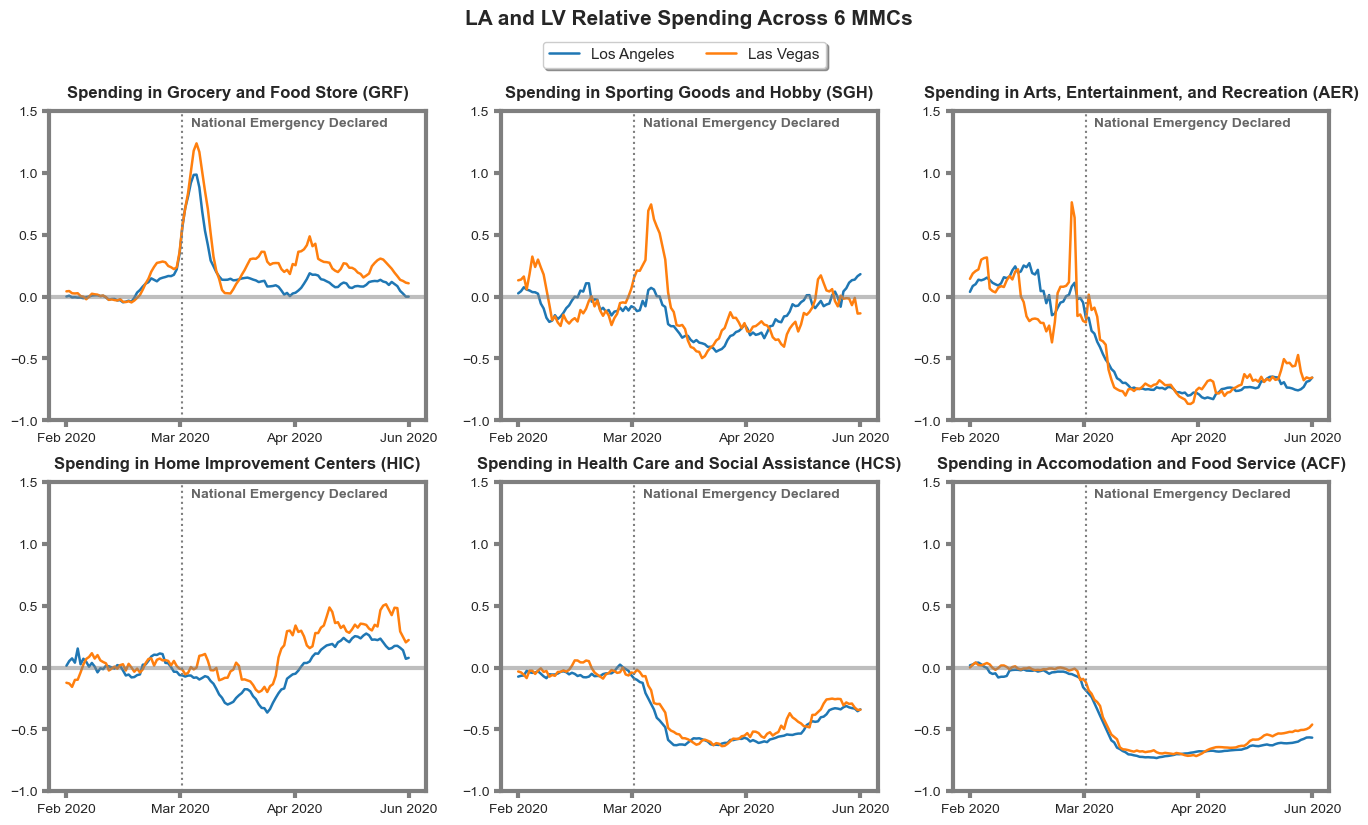

In [43]:
# Initialize layout
plt.style.use('seaborn-v0_8-white')
fig, axes = plt.subplots(2, 3, figsize=(16,8.5))

plt.subplots_adjust(
    left=0.1,
    right=0.9,
    bottom=0.1,
    top=0.9,
    wspace=0.2,
    hspace=0.2
)

# Plot and customize each subplot
for i, ax in enumerate(axes.flat):
    # Plot values across axes
    ax.plot('date', la_vs_lv_cols[i+2], data=la, lw=1.8, label='Los Angeles')
    ax.plot('date', la_vs_lv_cols[i+2], data=lv, lw=1.8, label='Las Vegas')

    # Subplot titles
    ax.set_title(subplot_titles[i], fontsize=12, fontweight='bold', pad=10)

    # Border
    ax.spines[:].set_color(grey50)
    ax.spines[:].set_linewidth(3)
    
    # Axes 
    ax.tick_params(direction='out', length=5, width=3, color=grey50)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.set_xticks(pd.date_range(start='2020-02-01', end='2020-06-01', periods=4))
    ax.set_yticks(np.arange(-1, 2, 0.5))

    insert_covid_ref_lines(ax, zero_ref_line=True, natl_emerg=True, height=1.38, z=3, fontsize=10)
    

# Legend
axes[0,0].legend(
    loc='upper left',
    ncols=2,
    fontsize=11,
    frameon=True, 
    fancybox=True,
    shadow=True, 
    bbox_to_anchor=(1.29, 1.25)
)

# Figure-level title
fig.suptitle('LA and LV Relative Spending Across 6 MMCs', fontsize=15, fontweight='bold', y=1.02)

plt.show()

Although Los Angeles and Las Vegas are quite different from one another, the relative consumer spending per MMC for each city follows the same long term trend. In SGH and AER, we do see two spikes in spending for Las Vegas, suggesting that residents in Las Vegas highly value entertainment and recreation. However, SGH seems to return to normal spending by June 2020 while AER remains well below baseline spending by June 2020. 

In GRF, we see that both cities spike in spending right after WHO officially announces the pandemic which can be explained by last minute panic buying. GRF also remains above baseline spending for the months afterwards.

For both Los Angeles and Las Vegas, spending in HIC increases after the pandemic is declared, suggesting that it was a common idea for people to upgrade their homes during lockdown.

HCS and ACF are two MMCs that follow a predicable trend: baseline spendinging until pandemic announcement, followed by a decline in spending, and then a shallow upwards trend in spending.